<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance

**Analyze Big Financial Data**

O'Reilly (2014)

Yves Hilpisch

<img style="border:0px solid grey;" src="http://hilpisch.com/python_for_finance.png" alt="Python for Finance" width="30%" align="left" border="0">

**Buy the book ** |
<a href='http://shop.oreilly.com/product/0636920032441.do' target='_blank'>O'Reilly</a> |
<a href='http://www.amazon.com/Yves-Hilpisch/e/B00JCYHHJM' target='_blank'>Amazon</a>

**All book codes & IPYNBs** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**The Python Quants GmbH** | <a href='http://pythonquants.com' target='_blank'>www.pythonquants.com</a>

**Contact us** | <a href='mailto:analytics@pythonquants.com'>analytics@pythonquants.com</a>

# Introductory Examples

In [1]:
import warnings
warnings.simplefilter('ignore')

## Implied Volatilities

In [2]:
V0 = 17.6639

In [3]:
r = 0.01

In [6]:
import pandas as pd
h5 = pd.HDFStore('./source/vstoxx_data_31032014.h5', 'r')
futures_data = h5['futures_data']  # VSTOXX futures data
options_data = h5['options_data']  # VSTOXX call option data
h5.close()

In [7]:
futures_data

,DATE,EXP_YEAR,EXP_MONTH,PRICE,MATURITY,TTM
496,2014-03-31,2014,4,17.85,2014-04-18,0.049
497,2014-03-31,2014,5,19.55,2014-05-16,0.126
498,2014-03-31,2014,6,19.95,2014-06-20,0.222
499,2014-03-31,2014,7,20.40,2014-07-18,0.299
500,2014-03-31,2014,8,20.70,2014-08-15,0.375
501,2014-03-31,2014,9,20.95,2014-09-19,0.471
502,2014-03-31,2014,10,21.05,2014-10-17,0.548
503,2014-03-31,2014,11,21.25,2014-11-21,0.644


In [8]:
options_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 46170 to 46564
Data columns (total 8 columns):
DATE         395 non-null datetime64[ns]
EXP_YEAR     395 non-null int64
EXP_MONTH    395 non-null int64
TYPE         395 non-null object
STRIKE       395 non-null float64
PRICE        395 non-null float64
MATURITY     395 non-null datetime64[ns]
TTM          395 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(2), object(1)
memory usage: 27.8+ KB


In [9]:
options_data[['DATE', 'MATURITY', 'TTM', 'STRIKE', 'PRICE']].head()

,DATE,MATURITY,TTM,STRIKE,PRICE
46170,2014-03-31,2014-04-18,0.049,1.0,16.85
46171,2014-03-31,2014-04-18,0.049,2.0,15.85
46172,2014-03-31,2014-04-18,0.049,3.0,14.85
46173,2014-03-31,2014-04-18,0.049,4.0,13.85
46174,2014-03-31,2014-04-18,0.049,5.0,12.85


In [10]:
options_data['IMP_VOL'] = 0.0
  # new column for implied volatilities

In [11]:
options_data

,DATE,EXP_YEAR,EXP_MONTH,TYPE,STRIKE,PRICE,MATURITY,TTM,IMP_VOL
46170,2014-03-31,2014,4,C,1.0,16.85,2014-04-18,0.049,0.0
46171,2014-03-31,2014,4,C,2.0,15.85,2014-04-18,0.049,0.0
46172,2014-03-31,2014,4,C,3.0,14.85,2014-04-18,0.049,0.0
46173,2014-03-31,2014,4,C,4.0,13.85,2014-04-18,0.049,0.0
46174,2014-03-31,2014,4,C,5.0,12.85,2014-04-18,0.049,0.0
46175,2014-03-31,2014,4,C,6.0,11.85,2014-04-18,0.049,0.0
46176,2014-03-31,2014,4,C,7.0,10.85,2014-04-18,0.049,0.0
46177,2014-03-31,2014,4,C,8.0,9.85,2014-04-18,0.049,0.0
46178,2014-03-31,2014,4,C,9.0,8.85,2014-04-18,0.049,0.0
46179,2014-03-31,2014,4,C,10.0,7.85,2014-04-18,0.049,0.0


In [12]:
from bsm_functions import *

In [13]:
tol = 0.5  # tolerance level for moneyness
for option in options_data.index:
    # iterating over all option quotes
    forward = futures_data[futures_data['MATURITY'] == \
                options_data.loc[option]['MATURITY']]['PRICE'].values[0]
      # picking the right futures value
    if (forward * (1 - tol) < options_data.loc[option]['STRIKE']
                             < forward * (1 + tol)):
        # only for options with moneyness within tolerance
        imp_vol = bsm_call_imp_vol(
                V0,  # VSTOXX value 
                options_data.loc[option]['STRIKE'],
                options_data.loc[option]['TTM'],
                r,   # short rate
                options_data.loc[option]['PRICE'],
                sigma_est=2.,  # estimate for implied volatility
                it=100)
        options_data['IMP_VOL'].loc[option] = imp_vol

In [15]:
options_data

,DATE,EXP_YEAR,EXP_MONTH,TYPE,STRIKE,PRICE,MATURITY,TTM,IMP_VOL
46170,2014-03-31,2014,4,C,1.0,16.85,2014-04-18,0.049,0.000000
46171,2014-03-31,2014,4,C,2.0,15.85,2014-04-18,0.049,0.000000
46172,2014-03-31,2014,4,C,3.0,14.85,2014-04-18,0.049,0.000000
46173,2014-03-31,2014,4,C,4.0,13.85,2014-04-18,0.049,0.000000
46174,2014-03-31,2014,4,C,5.0,12.85,2014-04-18,0.049,0.000000
46175,2014-03-31,2014,4,C,6.0,11.85,2014-04-18,0.049,0.000000
46176,2014-03-31,2014,4,C,7.0,10.85,2014-04-18,0.049,0.000000
46177,2014-03-31,2014,4,C,8.0,9.85,2014-04-18,0.049,0.000000
46178,2014-03-31,2014,4,C,9.0,8.85,2014-04-18,0.049,2.083388
46179,2014-03-31,2014,4,C,10.0,7.85,2014-04-18,0.049,1.804193


In [16]:
futures_data['MATURITY']
  # select the column with name MATURITY

496   2014-04-18
497   2014-05-16
498   2014-06-20
499   2014-07-18
500   2014-08-15
501   2014-09-19
502   2014-10-17
503   2014-11-21
Name: MATURITY, dtype: datetime64[ns]

In [17]:
options_data.loc[46170]
  # select data row for index 46170

DATE         2014-03-31 00:00:00
EXP_YEAR                    2014
EXP_MONTH                      4
TYPE                           C
STRIKE                         1
PRICE                      16.85
MATURITY     2014-04-18 00:00:00
TTM                        0.049
IMP_VOL                        0
Name: 46170, dtype: object

In [18]:
options_data.loc[46170]['STRIKE']
  # select only the value in column STRIKE
  # for index 46170 

1.0

In [19]:
plot_data = options_data[options_data['IMP_VOL'] > 0]

In [20]:
maturities = sorted(set(options_data['MATURITY']))
maturities

[Timestamp('2014-04-18 00:00:00'),
 Timestamp('2014-05-16 00:00:00'),
 Timestamp('2014-06-20 00:00:00'),
 Timestamp('2014-07-18 00:00:00'),
 Timestamp('2014-08-15 00:00:00'),
 Timestamp('2014-09-19 00:00:00'),
 Timestamp('2014-10-17 00:00:00'),
 Timestamp('2014-11-21 00:00:00')]

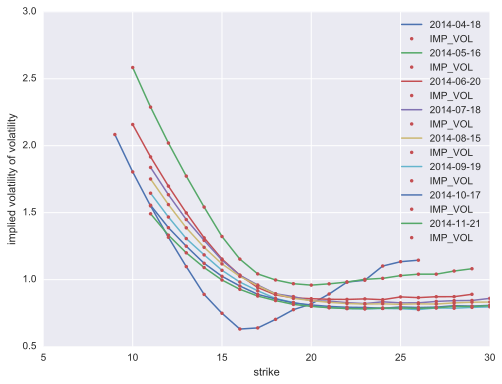

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8, 6))
for maturity in maturities:
    data = plot_data[options_data.MATURITY == maturity]
      # select data for this maturity
    plt.plot(data['STRIKE'], data['IMP_VOL'],
             label=maturity.date(), lw=1.5)
    plt.plot(data['STRIKE'], data['IMP_VOL'], 'r.')
plt.grid(True) 
plt.xlabel('strike')
plt.ylabel('implied volatility of volatility')
plt.legend()
plt.show()
# tag: vs_imp_vol
# title: Implied volatilities (of volatility) for European call options on the VSTOXX on 31. March 2014

In [22]:
keep = ['PRICE', 'IMP_VOL']
group_data = plot_data.groupby(['MATURITY', 'STRIKE'])[keep]
group_data

In [23]:
group_data = group_data.sum()
group_data.head()

PRICE   IMP_VOL
MATURITY   STRIKE                 
2014-04-18 9.0      8.85  2.083388
           10.0     7.85  1.804193
           11.0     6.85  1.550283
           12.0     5.85  1.316103
           13.0     4.85  1.097184

In [24]:
group_data.index.levels

FrozenList([[2014-04-18 00:00:00, 2014-05-16 00:00:00, 2014-06-20 00:00:00, 2014-07-18 00:00:00, 2014-08-15 00:00:00, 2014-09-19 00:00:00, 2014-10-17 00:00:00, 2014-11-21 00:00:00], [9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0]])

## Monte Carlo Simulation

In [26]:
from bsm_functions import bsm_call_value
S0 = 100.
K = 105.
T = 1.0
r = 0.05
sigma = 0.2
bsm_call_value(S0, K, T, r, sigma)

8.0213522351431763

### Pure Python

In [27]:
%run mcs_pure_python.py

European Option Value   7.999
Duration in Seconds    28.036


In [28]:
sum_val = 0.0
for path in S:
    # C-like iteration for comparison
    sum_val += max(path[-1] - K, 0)
C0 = exp(-r * T) * sum_val / I
round(C0, 3)

7.999

### Vectorization with NumPy

In [30]:
v = range(1, 6)
print(v)

[1, 2, 3, 4, 5]


In [31]:
2 * v

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [32]:
import numpy as np
v = np.arange(1, 6)
v

array([1, 2, 3, 4, 5])

In [33]:
2 * v

array([ 2,  4,  6,  8, 10])

In [34]:
%run mcs_vector_numpy.py

European Option Value   8.037
Duration in Seconds     1.279


In [35]:
round(tpy / tnp1, 2)

21.92

### Full Vectorization with Log Euler Scheme

In [36]:
%run mcs_full_vector_numpy.py

European Option Value   8.166
Duration in Seconds     1.501


### Graphical Analysis

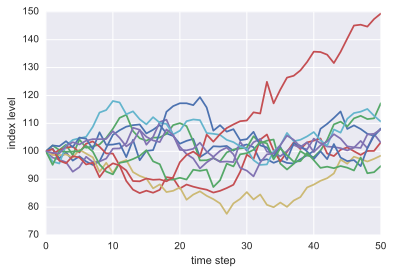

In [37]:
import matplotlib.pyplot as plt
plt.plot(S[:, :10])
plt.grid(True)
plt.xlabel('time step')
plt.ylabel('index level')
# tag: index_paths
# title: The first 10 simulated index level paths

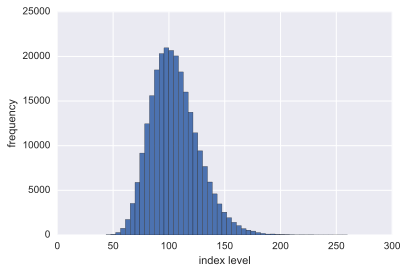

In [38]:
plt.hist(S[-1], bins=50)
plt.grid(True)
plt.xlabel('index level')
plt.ylabel('frequency')
# tag: index_histo
# title: Histogram of all simulated end of period index level values

(0, 50000)

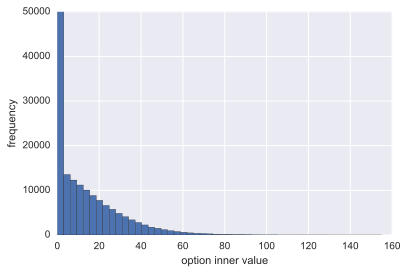

In [39]:
plt.hist(np.maximum(S[-1] - K, 0), bins=50)
plt.grid(True)
plt.xlabel('option inner value')
plt.ylabel('frequency')
plt.ylim(0, 50000)
# tag: option_iv_hist
# title: Histogram of all simulated end of period option inner values

In [40]:
sum(S[-1] < K)

133533

## Technical Analysis

In [41]:
import numpy as np
import pandas as pd
import pandas.io.data as web

In [42]:
sp500 = web.DataReader('^GSPC', data_source='yahoo',
                       start='1/1/2000', end='4/14/2014')
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3592 entries, 2000-01-03 to 2014-04-14
Data columns (total 6 columns):
Open         3592 non-null float64
High         3592 non-null float64
Low          3592 non-null float64
Close        3592 non-null float64
Volume       3592 non-null int64
Adj Close    3592 non-null float64
dtypes: float64(5), int64(1)
memory usage: 196.4 KB


In [43]:
sp500.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-04-08,1845.479980,1854.949951,1837.489990,1851.959961,3721450000,1851.959961
2014-04-09,1852.640015,1872.430054,1852.380005,1872.180054,3308650000,1872.180054
2014-04-10,1872.280029,1872.530029,1830.869995,1833.079956,3758780000,1833.079956
2014-04-11,1830.650024,1835.069946,1814.359985,1815.689941,3743460000,1815.689941
2014-04-14,1818.180054,1834.189941,1815.800049,1830.609985,3111540000,1830.609985


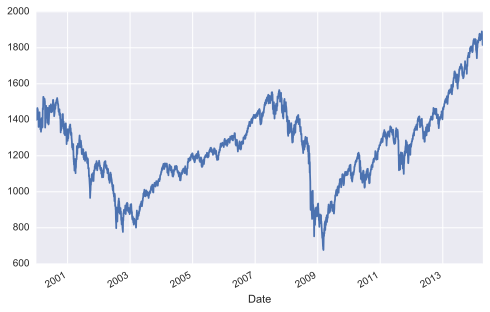

In [44]:
sp500['Close'].plot(grid=True, figsize=(8, 5))
# tag: sp500
# title: Historical levels of the S&P 500 index

In [45]:
sp500['42d'] = np.round(pd.rolling_mean(sp500['Close'], window=42), 2)
sp500['252d'] = np.round(pd.rolling_mean(sp500['Close'], window=252), 2)

In [46]:
sp500[['Close', '42d', '252d']].tail()

,Close,42d,252d
Date,,,
2014-04-08,1851.959961,1853.88,1728.66
2014-04-09,1872.180054,1855.67,1729.79
2014-04-10,1833.079956,1856.46,1730.74
2014-04-11,1815.689941,1856.36,1731.64
2014-04-14,1830.609985,1856.63,1732.74


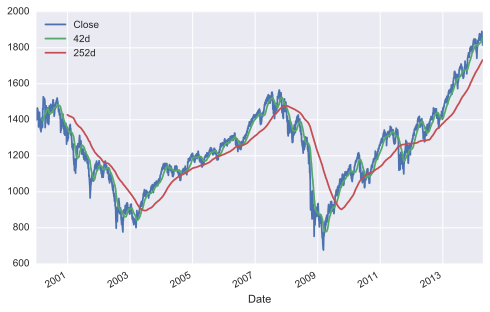

In [47]:
sp500[['Close', '42d', '252d']].plot(grid=True, figsize=(8, 5))
# tag: sp500_trend
# title: The S&P 500 index with 42d and 252d trend lines

In [48]:
sp500['42-252'] = sp500['42d'] - sp500['252d']
sp500['42-252'].tail()

Date
2014-04-08    125.22
2014-04-09    125.88
2014-04-10    125.72
2014-04-11    124.72
2014-04-14    123.89
Name: 42-252, dtype: float64

In [49]:
sp500['42-252'].head()

Date
2000-01-03   NaN
2000-01-04   NaN
2000-01-05   NaN
2000-01-06   NaN
2000-01-07   NaN
Name: 42-252, dtype: float64

In [50]:
SD = 50
sp500['Regime'] = np.where(sp500['42-252'] > SD, 1, 0)
sp500['Regime'] = np.where(sp500['42-252'] < -SD, -1, sp500['Regime'])
sp500['Regime'].value_counts()

 1    1489
 0    1232
-1     871
Name: Regime, dtype: int64

(-1.1, 1.1)

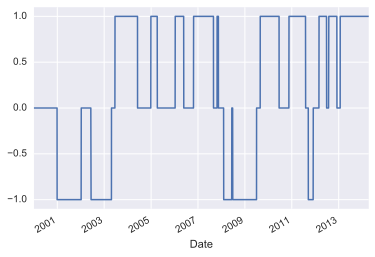

In [51]:
sp500['Regime'].plot(lw=1.5, grid=True)
plt.ylim([-1.1, 1.1])
# tag: sp500_signal
# title: Signal regimes over time

In [52]:
sp500['Market'] = np.log(sp500['Close'] / sp500['Close'].shift(1))

In [53]:
sp500['Strategy'] = sp500['Regime'].shift(1) * sp500['Market']

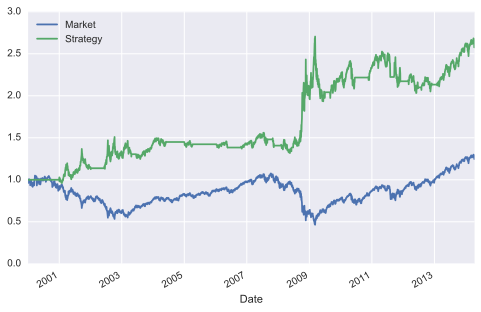

In [54]:
sp500[['Market', 'Strategy']].cumsum().apply(np.exp).plot(grid=True,
                                                    figsize=(8, 5))
# tag: sp500_wealth
# title: The S&P 500 index vs. investor's wealth

## Conclusions

## Further Reading

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://www.pythonquants.com" target="_blank">www.pythonquants.com</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a>

<a href="mailto:analytics@pythonquants.com">analytics@pythonquants.com</a>

**Python Quant Platform** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**Derivatives Analytics with Python** |
<a href="http://www.derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Python for Finance** |
<a href="http://shop.oreilly.com/product/0636920032441.do" target="_blank">Python for Finance @ O'Reilly</a>